In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
to_train=pd.read_csv('input/train_time.csv')

In [3]:
to_train.head()

,id,label,college,rank,total_people,rank_percent,countM1,price_sumM1,price_avgM1,price_maxM1,...,地点263_avg,地点263_max,地点263_min,地点263_median,地点840_count,地点840_sum,地点840_avg,地点840_max,地点840_min,地点840_median
0,0,0.0,9.0,1.0,2933.0,0.000341,49.0,201.31,4.108367,36.4,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0
1,1,0.0,9.0,2.0,2933.0,0.000682,-1.0,-1.00,-1.000000,-1.0,...,-1.0,-1.0,-1.0,-1.0,19.0,117.0,6.157895,7.0,4.0,6.0
2,8,0.0,6.0,1565.0,1572.0,0.995547,97.0,347.74,3.584948,10.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0
3,9,0.0,6.0,1570.0,1572.0,0.998728,98.0,491.01,5.010306,17.5,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,-1.0,-1.0,-1.0
4,10,0.0,3.0,1.0,2301.0,0.000435,27.0,82.96,3.072593,22.3,...,-1.0,-1.0,-1.0,-1.0,2.0,7.0,3.500000,4.0,3.0,3.5


In [4]:
to_train['label'].value_counts()

0.0       9325
1000.0     741
1500.0     465
2000.0     354
Name: label, dtype: int64

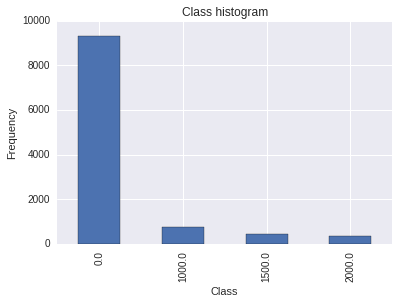

In [5]:
count_classes = pd.value_counts(to_train['label'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [6]:
X = to_train.ix[:, to_train.columns != 'label']
y = to_train.ix[:, to_train.columns == 'label']

In [26]:
# 这里的采样方式，会造成数据分布变化 // resample to all data

from sklearn.cross_validation import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2017)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

('Number transactions train dataset: ', 7619)
('Number transactions test dataset: ', 3266)
('Total number of transactions: ', 10885)


In [27]:
X_train.shape

(7619, 431)

In [28]:
train=X_train
train['label']=y_train

train.to_csv('./input/train_feature.csv',index=False)
train=pd.read_csv('./input/train_feature.csv')

/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [29]:
number_records_fraud = len(train[train.label != 0])
fraud_indices = np.array(train[train.label != 0].index)

# Picking the indices of the normal classes
normal_indices = train[train.label == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = train.iloc[under_sample_indices,:]

X_undersample = under_sample_data.ix[:, under_sample_data.columns != 'label']
y_undersample = under_sample_data.ix[:, under_sample_data.columns == 'label']

# Showing ratio
print("Number of normal transactions: ", len(under_sample_data[under_sample_data.label == 0]))
print("Number of fraud transactions: ", len(under_sample_data[under_sample_data.label != 0]))
print("Total number of transactions in resampled data: ", len(under_sample_data))

# Oversample
Oversampling1000 = train.loc[train.label == 1000]
Oversampling1500 = train.loc[train.label == 1500]
Oversampling2000 = train.loc[train.label == 2000]
'''
for i in range(6):
    train = train.append(Oversampling1000)
for j in range(10):
    train = train.append(Oversampling1500)
for k in range(12):
    train = train.append(Oversampling2000)
'''
for i in range(5):
    train = train.append(Oversampling1000)
for j in range(8):
    train = train.append(Oversampling1500)
for k in range(10):
    train = train.append(Oversampling2000)
    
train = train[train['label'].notnull()]

('Number of normal transactions: ', 1104)
('Number of fraud transactions: ', 1104)
('Total number of transactions in resampled data: ', 2208)


In [30]:
train.shape

(15394, 432)

In [31]:
# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 2017)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))



('Number transactions train dataset: ', 1545)
('Number transactions test dataset: ', 663)
('Total number of transactions: ', 2208)


---

In [32]:
def f1_macro(label_truth, predictions):
    df=pd.DataFrame(columns=["subsidy_x","subsidy_y"])
    df.subsidy_y=predictions
    df.subsidy_x=np.array(label_truth)
    df.subsidy_y = df.subsidy_y.apply(lambda x:int(x))

    
    correct = df[df['subsidy_x'] == df['subsidy_y']]
    s = 0
    for i in [1000, 1500, 2000]:
        #print i
        r = float(sum(correct['subsidy_y'] == i))/sum(df['subsidy_x'] == i)
        #print r
        p = float(sum(correct['subsidy_y'] == i))/sum(df['subsidy_y'] == i)        
        #print p
        f = r*p*2/(r+p)
        if not np.isnan(f):
            s += (float(sum(df['subsidy_x'] == i))/df.shape[0])*f
    return s

In [33]:
import xgboost as xgb

In [53]:
model=xgb.XGBClassifier()

In [90]:
target = 'label'
IDcol = 'id'
ids = X_test['id'].values
all_feature = [x for x in train.columns if x not in [target,IDcol]]

In [91]:
predictors=all_feature
#predictors = [x for x in all_feature if (x in new_feature.index)]
#predictors = [x for x in all_feature if (x in all_feature) & (x != 'id')]
#predictors = [x for x in all_feature if x in all_feature]

In [92]:
#model.fit(X_undersample[predictors],y_undersample[target])
model.fit(train[predictors],train[target])
prediction=model.predict(X_test[predictors])
f1_macro(y_test,prediction)

0.02921131464705735

In [99]:
def tuning_seed():

    score=[]
    for seed in (7,42,1996,2017,21,33):

        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = seed)
    
        train=X_train
        train['label']=y_train
    
        Oversampling1000 = train.loc[train.label == 1000]
        Oversampling1500 = train.loc[train.label == 1500]
        Oversampling2000 = train.loc[train.label == 2000]

        for i in range(5):
            train = train.append(Oversampling1000)
        for j in range(8):
            train = train.append(Oversampling1500)
        for k in range(10):
            train = train.append(Oversampling2000)
    
    
    
        model.fit(train[predictors],train[target])
        prediction=model.predict(X_test[predictors])
        print seed,f1_macro(y_test,prediction)
        score.append(f1_macro(y_test,prediction))
    #print tuning_target,
    print pd.DataFrame(score).mean()

In [102]:
for feature_n in (70,71):
    new_feature=feat_imp.head(feature_n)
    predictors = [x for x in all_feature if (x in new_feature.index)]
    
    print feature_n
    tuning_seed()

70


/home/kuhung/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


7 0.0304187527847
42 0.0318693666994
1996 0.0291956208751
2017 0.02824083306
21 0.0334907585787
33 0.0286655559336
0    0.030313
dtype: float64
71
7 0.0298707056933
42 0.0319035368561
1996 0.0308981815447
2017 0.0282735720039
21 0.0310838706901
33 0.0282443959202
0    0.030046
dtype: float64


In [95]:
#feat_imp=pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
#feat_imp.plot(kind='bar', title='Feature Importances')

In [103]:
new_feature=feat_imp.head(70)
predictors = [x for x in all_feature if (x in new_feature.index)]

In [104]:
new_feature.index

Index([    u'change_count',      u'price_sumH7',          u'countM8',
           u'price_avgH17',         u'countH17',         u'地点21_avg',
                u'countH8',      u'price_sumM9',        u'bathe_max',
             u'rest_sumM9',         u'地点65_max',      u'price_avgH7',
             u'rest_minM7',       u'rest_minM8',      u'bathe_count',
           u'price_avgH7-',     u'total_people',         u'地点91_avg',
           u'rank_percent',         u'地点72_sum',        u'bathe_sum',
         u'price_medianH8',      u'price_maxH7',      u'price_maxH9',
            u'price_sumM7',      u'price_maxM9',      u'price_sumM8',
            u'library_min',      u'buban_count',      u'price_sumM3',
            u'price_sumM1',       u'rest_sumM7',      u'price_maxWE',
              u'price_min',        u'地点996_min',   u'rest_medianM11',
           u'price_sumH19',         u'shop_avg', u'printhouse_count',
                   u'rank',     u'price_sumM11',        u'地点996_sum',
            u'price_

In [73]:
#new_feature.to_csv('input/big_nice_feature.csv')

In [42]:
feat_imp.count()

370

---

In [43]:
# -*- coding: utf-8 -*- 

In [44]:
new_feature=pd.DataFrame(data=new_feature.index)

In [45]:
new_feature=np.array(new_feature)

In [46]:
new_feature=pd.DataFrame(data=new_feature)

In [47]:
print new_feature[0]

0         change_count
1          price_sumH7
2              countM8
3         price_avgH17
4             countH17
5             地点21_avg
6              countH8
7          price_sumM9
8            bathe_max
9           rest_sumM9
10            地点65_max
11         price_avgH7
12          rest_minM7
13          rest_minM8
14         bathe_count
15        price_avgH7-
16        total_people
17            地点91_avg
18        rank_percent
19            地点72_sum
20           bathe_sum
21      price_medianH8
22         price_maxH7
23         price_maxH9
24         price_sumM7
25         price_maxM9
26         price_sumM8
27         library_min
28         buban_count
29         price_sumM3
30         price_sumM1
31          rest_sumM7
32         price_maxWE
33           price_min
34           地点996_min
35      rest_medianM11
36        price_sumH19
37            shop_avg
38    printhouse_count
39                rank
Name: 0, dtype: object
